In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def transform(img, filter, ksize=3):
    if(filter == 'sobelx'):
        return cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
    elif(filter == 'sobely'):
        return cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
    elif(filter == 'laplacian'):
        return cv2.Laplacian(img,cv2.CV_64F)
    elif(filter == 'averaging'):
        return cv2.blur(img,(ksize,ksize))
    elif(filter == 'median'):
        return cv2.medianBlur(img,ksize)

In [5]:
mri = cv2.imread('MRI.png',0)

In [6]:
sobelx = transform(mri,'sobelx')
sobely = transform(mri,'sobely')
laplacian = transform(mri,'laplacian')
ave = transform(mri,'averaging')
med = transform(mri,'median')

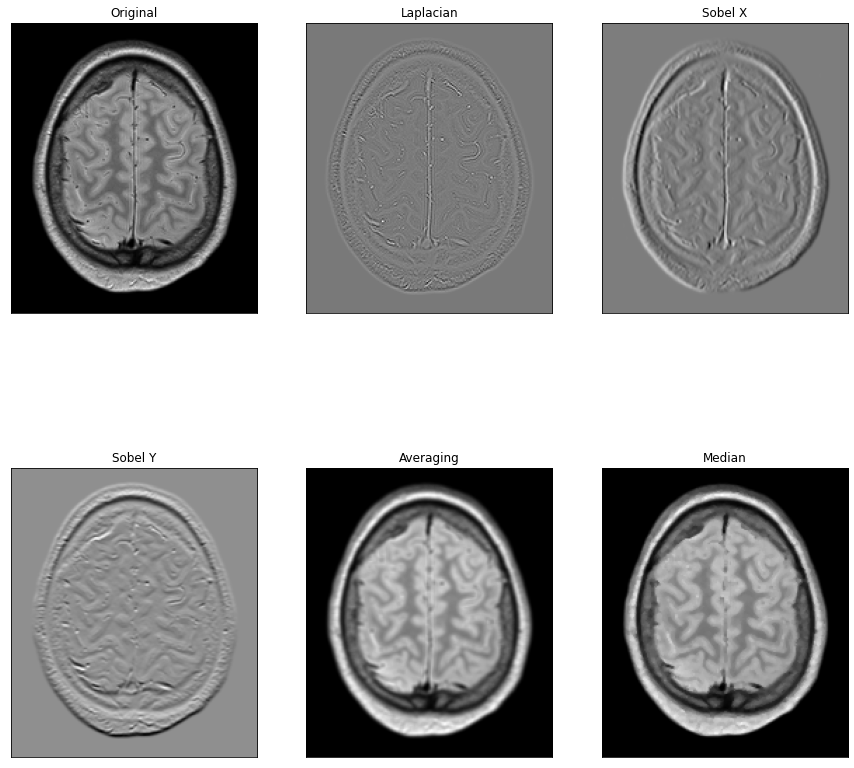

In [15]:
plt.figure(figsize=(15,15))
plt.subplot(2,3,1),plt.imshow(mri,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,5),plt.imshow(ave,cmap = 'gray')
plt.title('Averaging'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,6),plt.imshow(med,cmap = 'gray')
plt.title('Median'), plt.xticks([]), plt.yticks([])
plt.show()

در مشتق گیری در محورهای افقی و عمودی، تغییرات تصویر در راستای این محور ها بررسی میشد و خروجی مشخص کننده همین موضوع است.


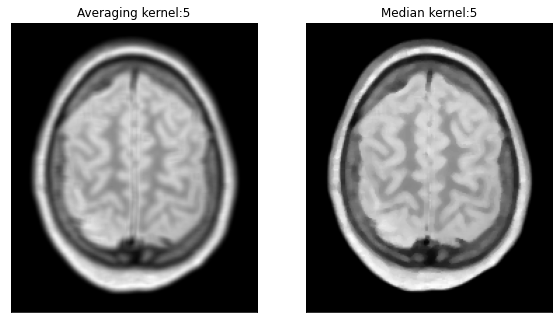

In [16]:
ave5 = transform(mri,'averaging',5)
med5 = transform(mri,'median',5)
plt.figure(figsize=(15,15))
plt.subplot(2,3,5),plt.imshow(ave5,cmap = 'gray')
plt.title('Averaging kernel:5'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,6),plt.imshow(med5,cmap = 'gray')
plt.title('Median kernel:5'), plt.xticks([]), plt.yticks([])
plt.show()

در تصاویر با کرنل 5 محوی بیشتری ایجاد شده است و جزئیات ریز تصویر کمتر دیده میشوند.

In [26]:
def custom_average(img):
    kernel = [[0,1,2,1,0],
              [1,2,4,2,1],
              [1,4,6,4,1],
              [1,2,4,2,1],
              [0,1,2,1,0]]
    kernel = np.array(kernel)
    kernel = kernel/40
    
    return cv2.filter2D(img, -1, kernel)

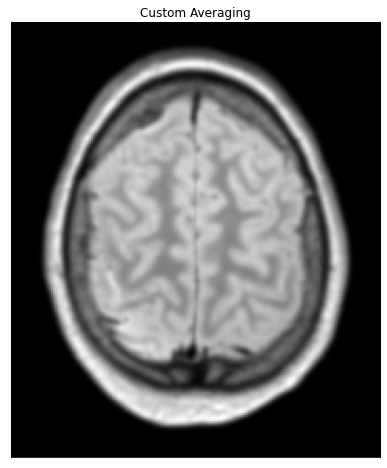

In [27]:
plt.figure(figsize=(8,8))
plt.subplot(111),plt.imshow(custom_average(mri),cmap = 'gray')
plt.title('Custom Averaging'), plt.xticks([]), plt.yticks([])
plt.show()